In [1]:
!pip install -U transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.9 MB/s 
     |████████████████████████████████| 7.6 MB 51.9 MB/s 
     |████████████████████████████████| 182 kB 65.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.2 MB/s 


In [2]:
import os
os.chdir('/content/drive/MyDrive/workspace/Learning_Equality')

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
topics_df = pd.read_csv('./data/row/topics.csv')
content_df = pd.read_csv('./data/row/content.csv')
correlations_df = pd.read_csv('./data/row/correlations.csv')

In [4]:
from transformers import AutoTokenizer, AutoConfig, AutoModel
model_name = 'microsoft/mdeberta-v3-base'
config = AutoConfig.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/579 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.8/dist-packages/transformers/convert_slow_tokenizer.py:446: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [5]:
topics_df.head()

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,NaN,b3f329,aligned,2,en,t_aa32fb6252dc,False
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True
3,t_00069b63a70a,Transcripts,NaN,6e3ba4,source,3,en,t_4054df11a74e,True
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True


In [6]:
display(topics_df[topics_df.id == 't_00004da3a1b2'])
display(topics_df[topics_df.id == 't_16e29365b50d'])
display(topics_df[topics_df.id == 't_c85886762db7'])
display(topics_df[topics_df.id == 't_27a0a3c7ee9a'])
display(topics_df[topics_df.id == 't_bcf10c48c68b'])

,id,title,description,channel,category,level,language,parent,has_content
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True


,id,title,description,channel,category,level,language,parent,has_content
6805,t_16e29365b50d,Открития и проекти,Преоткрийте най-важните научни наблюдения в хо...,000cf7,source,3,bg,t_c85886762db7,False


,id,title,description,channel,category,level,language,parent,has_content
59994,t_c85886762db7,Физика,"Научи кои са основните принципи, които управля...",000cf7,source,2,bg,t_27a0a3c7ee9a,False


,id,title,description,channel,category,level,language,parent,has_content
11801,t_27a0a3c7ee9a,Наука,NaN,000cf7,source,1,bg,t_bcf10c48c68b,False


,id,title,description,channel,category,level,language,parent,has_content
56530,t_bcf10c48c68b,Khan Academy (български език),NaN,000cf7,source,0,bg,NaN,False


In [7]:
display(topics_df[topics_df.id == 't_4054df11a74e'])
display(topics_df[topics_df.id == 't_acbbd893e6af'])
display(topics_df[topics_df.id == 't_9c5f09334d83'])

,id,title,description,channel,category,level,language,parent,has_content
19136,t_4054df11a74e,Flow Charts: Logical Thinking?,This lesson is focused on flow charts. It supp...,6e3ba4,source,2,en,t_acbbd893e6af,True


,id,title,description,channel,category,level,language,parent,has_content
51655,t_acbbd893e6af,Engineering,Video lessons about Engineering,6e3ba4,source,1,en,t_9c5f09334d83,False


,id,title,description,channel,category,level,language,parent,has_content
46688,t_9c5f09334d83,MIT Blossoms,NaN,6e3ba4,source,0,en,NaN,False


In [8]:
topics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76972 entries, 0 to 76971
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           76972 non-null  object
 1   title        76970 non-null  object
 2   description  34953 non-null  object
 3   channel      76972 non-null  object
 4   category     76972 non-null  object
 5   level        76972 non-null  int64 
 6   language     76972 non-null  object
 7   parent       76801 non-null  object
 8   has_content  76972 non-null  bool  
dtypes: bool(1), int64(1), object(7)
memory usage: 4.8+ MB


In [9]:
topics_df.category.value_counts()

source          43487
supplemental    19368
aligned         14117
Name: category, dtype: int64

In [10]:
topics_df.language.value_counts()

en     36161
es     13910
pt      4177
ar      3701
fr      3701
bg      2867
sw      2860
gu      2320
bn      2176
hi      1786
it       866
zh       862
mr       300
fil      247
as       167
my       135
km       121
kn       119
te        93
or        70
ur        66
ta        60
pnb       51
pl        43
tr        40
swa       35
ru        34
mul        4
Name: language, dtype: int64

In [11]:
topics_df.level.value_counts()

4     38810
3     14898
5      9744
6      6210
2      4874
1      1104
7      1028
0       171
8       119
9        12
10        2
Name: level, dtype: int64

In [12]:
content_df.head()

,id,title,description,kind,text,language,copyright_holder,license
0,c_00002381196d,"Sumar números de varios dígitos: 48,029+233,930","Suma 48,029+233,930 mediante el algoritmo está...",video,NaN,es,NaN,NaN
1,c_000087304a9e,Trovare i fattori di un numero,Sal trova i fattori di 120.\n\n,video,NaN,it,NaN,NaN
2,c_0000ad142ddb,Sumar curvas de demanda,Cómo añadir curvas de demanda\n\n,video,NaN,es,NaN,NaN
3,c_0000c03adc8d,Nado de aproximação,Neste vídeo você vai aprender o nado de aproxi...,document,\nNado de aproximação\nSaber nadar nas ondas ...,pt,Sikana Education,CC BY-NC-ND
4,c_00016694ea2a,geometry-m3-topic-a-overview.pdf,geometry-m3-topic-a-overview.pdf,document,Estándares Comunes del Estado de Nueva York\n\...,es,Engage NY,CC BY-NC-SA


In [13]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154047 entries, 0 to 154046
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                154047 non-null  object
 1   title             154038 non-null  object
 2   description       89456 non-null   object
 3   kind              154047 non-null  object
 4   text              74035 non-null   object
 5   language          154047 non-null  object
 6   copyright_holder  71821 non-null   object
 7   license           74035 non-null   object
dtypes: object(8)
memory usage: 9.4+ MB


In [14]:
content_df['title'] = content_df['title'].fillna('')
content_df['description'] = content_df['description'].fillna('')
content_df['title_len'] = content_df.title.apply(lambda x:len(tokenizer.tokenize(x)))
content_df['description_len'] = content_df.description.apply(lambda x:len(tokenizer.tokenize(x)))

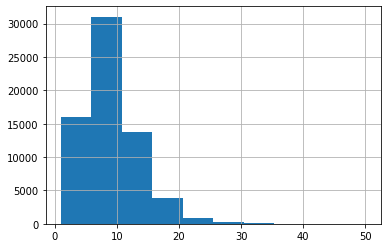

In [ ]:
content_df[content_df.language=='en'].title_len.hist(bins=10)
# plt.xlim(0,100)

In [ ]:
topics_df['title'] = topics_df['title'].fillna('')
topics_df['title_len'] = topics_df.title.apply(lambda x:len(tokenizer.tokenize(x)))
topics_df['description'] = topics_df['description'].fillna('')
topics_df['description_len'] = topics_df.description.apply(lambda x:len(tokenizer.tokenize(x)))

(0.0, 100.0)

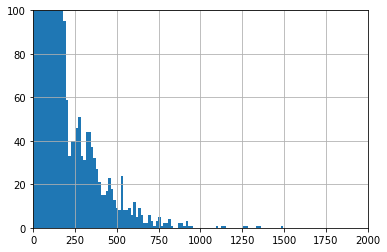

In [ ]:
topics_df.description_len.hist(bins=100)
plt.xlim(0,2000)
plt.ylim(0,100)

In [ ]:
content_df.groupby("language").describe()

title_len                                                      \
             count       mean        std  min    25%   50%   75%   max   
language                                                                 
ar          7418.0  12.275681   9.814576  1.0   4.00  10.0  18.0  86.0   
as           641.0  18.379095  11.026026  2.0   9.00  17.0  24.0  52.0   
bg          6050.0  12.472397   5.140864  1.0   9.00  12.0  15.0  43.0   
bn          2513.0  13.569041   6.771647  2.0   9.00  13.0  17.0  79.0   
en         65939.0   8.742777   4.482792  1.0   6.00   8.0  11.0  50.0   
es         30844.0   9.494424   5.054256  0.0   6.00   9.0  13.0  50.0   
fil          516.0   8.162791   4.739081  1.0   4.75   7.0  11.0  26.0   
fr         10682.0  12.367628   6.934628  1.0   7.00  11.0  16.0  52.0   
gu          3677.0  14.902366   6.841274  2.0  10.00  14.0  19.0  47.0   
hi          4042.0  14.252350   8.363414  1.0   8.00  12.0  19.0  53.0   
it          1300.0   9.878462   3.633816  2.0   7.00  10.0  12.0  23.0   
km           505.0  10.196040   4.143649  2.0   7.00  10.0  13.0  24.0   
kn           501.0  13.275449   8.823377  2.0   6.00  11.0  20.0  43.0   
mr           999.0   8.784785   4.060505  1.0   6.00   8.0  11.0  29.0   
my           206.0  14.286408   6.545191  2.0   9.00  13.0  19.0  32.0   
or           326.0  21.052147  17.688598  2.0   9.00  14.0  29.0  71.0   
pl           319.0   7.927900   3.553429  1.0   5.00   7.0  10.0  19.0   
pnb          184.0   7.538043   3.948946  2.0   5.00   7.0   9.0  21.0   
pt         10435.0  10.340201   4.619490  1.0   7.00  10.0  13.0  34.0   
ru           188.0  10.000000   3.392347  2.0   8.00  10.0  12.0  17.0   
sw          1447.0  12.756047   5.033559  2.0   9.00  13.0  16.0  31.0   
swa          495.0  11.214141   6.101254  2.0   7.00   9.0  14.0  36.0   
ta           216.0   5.824074   2.696522  1.0   4.00   5.0   7.0  17.0   
te           285.0   7.224561   3.256428  2.0   5.00   6.0   9.0  19.0   
tr           225.0   9.275556   3.876967  1.0   6.00  10.0  12.0  19.0   
ur           245.0   6.800000   3.490737  2.0   4.00   6.0   9.0  24.0   
zh          3849.0   7.522733   3.082977  2.0   5.00   7.0   9.0  30.0   

         description_len                                                  \
                   count       mean         std   min   25%   50%    75%   
language                                                                   
ar                7418.0  17.620922   35.913856   0.0   0.0   0.0  16.00   
as                 641.0  10.280811   14.186451   0.0   0.0   0.0  28.00   
bg                6050.0  34.612727   24.139999   0.0  20.0  30.0  42.00   
bn                2513.0  27.324314   22.245739   0.0  13.0  28.0  37.00   
en               65939.0  14.578353   51.261158   0.0   0.0   0.0  15.00   
es               30844.0  25.878064   89.204725   0.0   0.0  14.0  27.00   
fil                516.0   0.096899    1.282560   0.0   0.0   0.0   0.00   
fr               10682.0  27.595394   41.230497   0.0   2.0  21.0  32.00   
gu                3677.0  35.557248   25.355745   0.0  23.0  32.0  44.00   
hi                4042.0  23.873577   22.230989   0.0   0.0  26.0  33.00   
it                1300.0  25.631538   13.797851   0.0  17.0  23.0  31.00   
km                 505.0  19.568317   13.370179   0.0  13.0  18.0  24.00   
kn                 501.0  19.848303   28.393819   0.0   0.0  28.0  30.00   
mr                 999.0  27.288288   10.558121   0.0  27.0  29.0  31.00   
my                 206.0  33.048544   23.198561   0.0  22.0  28.0  36.00   
or                 326.0  17.898773   14.373443   0.0   0.0  27.0  29.00   
pl                 319.0  47.899687   36.673761   0.0  20.0  26.0  71.00   
pnb                184.0  29.586957    2.492183  23.0  28.0  29.0  31.00   
pt               10435.0  32.561763   40.799482   0.0  17.0  27.0  37.00   
ru                 188.0  49.622340  131.516376   0.0   0.0  23.0  31.25   
sw                1447.0  24.541811   15

In [ ]:
topics_df.head()

,id,title,description,channel,category,level,language,parent,has_content,title_len,description_len
0,t_00004da3a1b2,Откриването на резисторите,"Изследване на материали, които предизвикват на...",000cf7,source,4,bg,t_16e29365b50d,True,8,34
1,t_000095e03056,Unit 3.3 Enlargements and Similarities,,b3f329,aligned,2,en,t_aa32fb6252dc,False,9,0
2,t_00068291e9a4,Entradas e saídas de uma função,Entenda um pouco mais sobre funções.,8e286a,source,4,pt,t_d14b6c2a2b70,True,12,10
3,t_00069b63a70a,Transcripts,,6e3ba4,source,3,en,t_4054df11a74e,True,2,0
4,t_0006d41a73a8,Графики на експоненциални функции (Алгебра 2 н...,Научи повече за графиките на сложните показате...,000cf7,source,4,bg,t_e2452e21d252,True,18,31


In [ ]:
import tqdm
import math
import pickle
child_ids = topics_df[topics_df.has_content==True].id
result = []
for idx, child_id in tqdm.tqdm(enumerate(child_ids), total=len(child_ids)):
    res_list = [child_id]
    while True:
        child_id = topics_df[topics_df.id==child_id].parent.item()
        if (topics_df.id==child_id).sum()!=0:
          res_list.append(child_id)
        else:
          break
    result.append(res_list)
with open('./data/processed/topic_hierarchy.txt', 'wb') as f:
  pickle.dump(result, f)

100%|██████████| 61517/61517 [1:08:40<00:00, 14.93it/s]


In [34]:
import pickle
f = open('./data/processed/topic_hierarchy.txt',"rb")
list_row = pickle.load(f)

In [44]:
res = [x[::-1] for x in list_row]

In [45]:
max_len = max(map(len, res))
array = np.array(list(map(lambda x: x + [""]*(max_len-len(x)), res)))

In [54]:
df_topic_hierarchy = pd.DataFrame(array).sort_values(by=list(range(0,11)))
df_topic_hierarchy.columns = [f"level_{i}" for i in range(max_len)]
df_topic_hierarchy.to_csv("./data/processed/topic_hierarchy.csv")

In [55]:
topics_df[topics_df.id=='t_0325dce6b388']

,id,title,description,channel,category,level,language,parent,has_content
957,t_0325dce6b388,CBSE,NaN,ef2088,supplemental,0,en,NaN,False


In [71]:
df_topic_hierarchy.value_counts("level_4")

level_4
                  9622
t_344131c2889b     270
t_846fde9a9cde     232
t_c35bc933b432     130
t_881b563f2af2      85
                  ... 
t_5825872145e6       1
t_582c186d7619       1
t_582e8a9a9bcb       1
t_58324f45051a       1
t_fffe88835149       1
Length: 38473, dtype: int64

(0.0, 100.0)

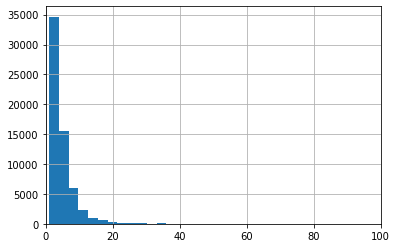

In [72]:
correlations_df.content_ids.apply(lambda x:len(x.split(' '))).hist(bins=100)
plt.xlim(0, 100)

In [80]:
content_list = correlations_df.content_ids.apply(lambda x:x.split(' ')).tolist()
import collections
collections.Counter(sum(content_list, []))

Counter({'c_1108dd0c7a5d': 2,
         'c_376c5a8eb028': 2,
         'c_5bc0e1e2cba0': 2,
         'c_76231f9d0b5e': 1,
         'c_639ea2ef9c95': 3,
         'c_89ce9367be10': 3,
         'c_ac1672cdcd2c': 3,
         'c_ebb7fdf10a7e': 3,
         'c_11a1dc0bfb99': 1,
         'c_0c6473c3480d': 3,
         'c_1c57a1316568': 3,
         'c_5e375cf14c47': 3,
         'c_b972646631cb': 5,
         'c_d7a0d7eaf799': 3,
         'c_34e1424229b4': 3,
         'c_7d1a964d66d5': 5,
         'c_aab93ee667f4': 6,
         'c_7ff92a954a3d': 1,
         'c_8790b074383e': 1,
         'c_07f1d0eec4b2': 11,
         'c_15a6fb858696': 11,
         'c_175e9db3fc44': 11,
         'c_1c2e804fa58a': 11,
         'c_1ec97b588bce': 12,
         'c_247c609418f3': 10,
         'c_3a2bf4a358da': 12,
         'c_451671e513d2': 12,
         'c_4698dc0a94dc': 11,
         'c_4aea397ae55e': 9,
         'c_5299d6442ed8': 12,
         'c_6e5ae1f2bb90': 10,
         'c_76a17cfb9d87': 12,
         'c_7868f655c31e': 1

In [88]:
res_df = correlations_df[correlations_df.content_ids.str.contains('c_366af38f2538')]
res_df = topics_df[topics_df.id.isin(res_df.topic_id)]
display(res_df)

,id,title,description,channel,category,level,language,parent,has_content
107,t_0065df081747,Objects in freefall,We don't believe in memorizing formulas and ne...,2ee29d,aligned,4,en,t_09fc8a714156,True
2855,t_09a201fac913,Kinematic formulas and projectile motion,We don't believe in memorizing formulas and ne...,2ee29d,aligned,4,en,t_6d12bf43a305,True
55982,t_bb2969483ca2,Kinematic formulas and projectile motion,We don't believe in memorizing formulas and ne...,0ec697,source,4,en,t_dc73bde76c3c,True


In [92]:
for i, d in res_df.iterrows():
  display(df_topic_hierarchy[df_topic_hierarchy.loc[:, f'level_{d.level}']==d.id])

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10
82,t_8046010a623f,t_9c43df1f2dfc,t_89e0fb0a96a7,t_09fc8a714156,t_0065df081747,,,,,,


,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10
2282,t_8046010a623f,t_cc2c9ee75232,t_7cb53a86411f,t_6d12bf43a305,t_09a201fac913,,,,,,


,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10
44740,t_b22641d12ddc,t_c0eea031b3c5,t_975467397367,t_dc73bde76c3c,t_bb2969483ca2,,,,,,
